`I`mports

In [61]:
import pandas as pd
import numpy as np
import re

from datetime import datetime
import time

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer

from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

`L`oad Data

In [117]:
df = pd.read_csv('../data/ready_data/reddit_data.csv')

In [118]:
bg_df = df[df['subreddit'] == 0]
wsb_df = df[df['subreddit'] == 1]

In [119]:
df.head(1)

,selftext,title,score,domain,id,author,num_comments,url,created_utc,subreddit,...,selftext_emoji_count,title_emoji_count,subreddit_text,subreddit_text_length,subreddit_text_word_count,subreddit_text_emoji_count,subreddit_text_sent_neg,subreddit_text_sent_neu,subreddit_text_sent_pos,subreddit_text_sent_compound
0,If I wanted to play a virtual board game remot...,Virtual board games you can host over Zoom?,1,self.boardgames,105yauz,TylerDeLarm,0,https://www.reddit.com/r/boardgames/comments/1...,1673122098,0,...,0,0,if i wanted to play a virtual board ga...,684,120,0,0.016,0.758,0.226,0.9822


In [120]:
df.shape

(12895, 24)

In [121]:
df['subreddit'].value_counts(normalize=True)

1    0.571694
0    0.428306
Name: subreddit, dtype: float64

----
## Overall Data Analysis

In [122]:
# Set the default text font size
plt.rc('font', size=36)
# Set the axes title font size
plt.rc('axes', titlesize=36)
# Set the axes labels font size
plt.rc('axes', labelsize=20)
# Set the font size for x tick labels
plt.rc('xtick', labelsize=18)
# Set the font size for y tick labels
plt.rc('ytick', labelsize=18)
# Set the legend font size
plt.rc('legend', fontsize=28)
# Set the font size of the figure title
plt.rc('figure', titlesize=30)

Models `Performance`

In [123]:
model_stats = [
  {
    'Train': 94.4,
    'Test': 92.8,
    'Spec': 93,
    'Sens': 93,
    'Model': 'Naive Bayes',
  },
  {
    'Train': 95.9,
    'Test': 93.8,
    'Spec': 87,
    'Sens': 99,
    'Model': 'Logistic Regression',
  },
  {
    'Train': 77.9,
    'Test': 68.1,
    'Spec': 35,
    'Sens': 93,
    'Model': 'KNN',
  },
  {
    'Train': 86.4,
    'Test': 85,
    'Spec': 66.2,
    'Sens': 99,
    'Model': 'Decision Tree',
  },
  {
    'Train': 98.7,
    'Test': 93.1,
    'Spec': 88.8,
    'Sens': 96.3,
    'Model': 'Bagging',
  },
  {
    'Train': 84.8,
    'Test': 84,
    'Spec': 64,
    'Sens': 98.9,
    'Model': 'Random Forest',
  },
  {
    'Train': 85.2,
    'Test': 83.9,
    'Spec': 62.8,
    'Sens': 99.6,
    'Model': 'Ada Boost',
  },
  {
    'Train': 96.3,
    'Test': 94.4,
    'Spec': 90.1,
    'Sens': 97.7,
    'Model': 'Voting Classifier',
  }
]

model_per_df = pd.DataFrame(model_stats)
model_per_df.describe()

,Train,Test,Spec,Sens
count,8.000000,8.000000,8.000000,8.000000
mean,89.950000,86.887500,73.362500,97.062500
std,7.357989,8.876685,20.043805,2.707628
min,77.900000,68.100000,35.000000,93.000000
25%,85.100000,83.975000,63.700000,95.475000
50%,90.400000,88.900000,76.600000,98.300000
75%,96.000000,93.275000,89.125000,99.000000
max,98.700000,94.400000,93.000000,99.600000


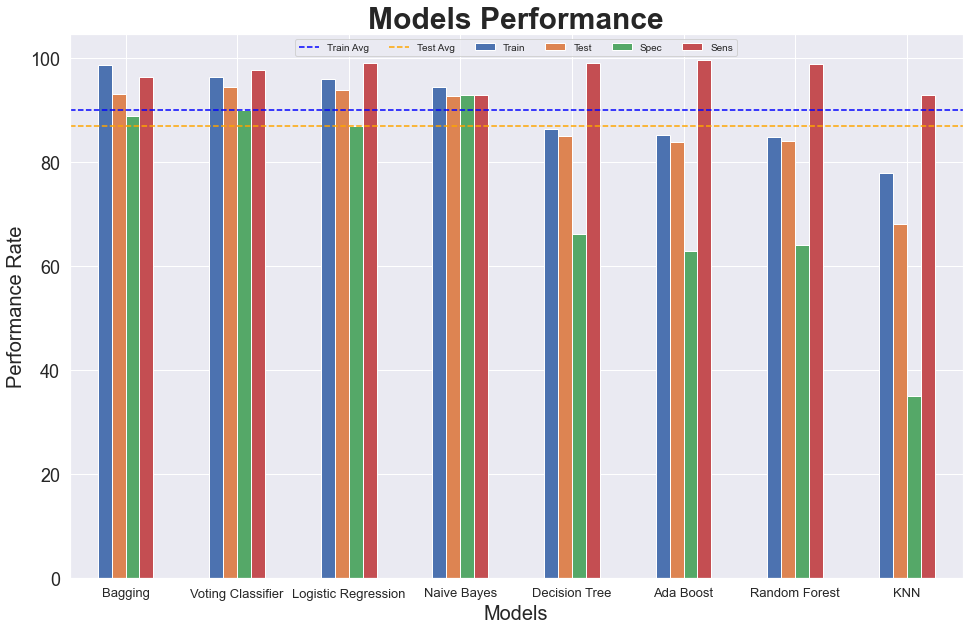

In [124]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10))
model_per_df.groupby('Model').mean().sort_values(['Train', 'Test'], ascending=[False, True]).plot(kind='bar', ax=ax)

ax.set_title('Models Performance', fontsize=30, fontweight='bold')
ax.set_ylabel('Performance Rate', fontsize=20)
ax.set_xlabel('Models', fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=13)

ax.axhline(y = 89.95, color = 'blue', linestyle = '--', label='Train Avg')
ax.axhline(y = 86.89, color = 'orange', linestyle = '--', label='Test Avg')
ax.legend(fontsize=10, loc='upper center', ncol=6)

plt.savefig('../presentation/charts/models_performance')

Word `Count` and `Length` Distribution

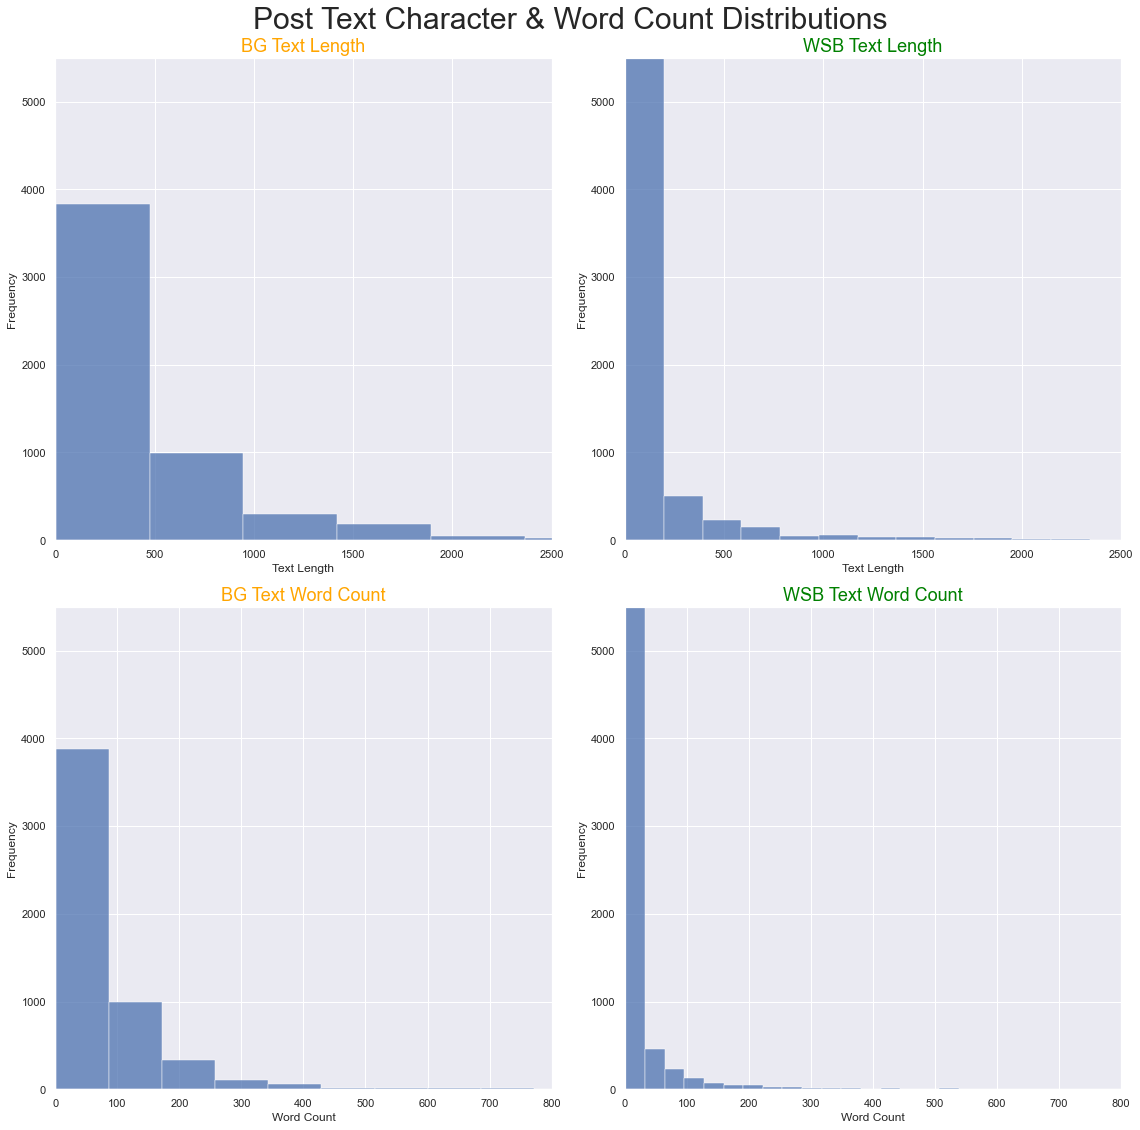

In [129]:
fig, ax = plt.subplots(2, 2, figsize=(16,16))
sns.set(style="darkgrid")
sns.histplot(bg_df['subreddit_text_length'], ax=ax[0,0], bins=83)
sns.histplot(wsb_df['subreddit_text_length'], ax=ax[0,1], bins=83)
sns.histplot(bg_df['subreddit_text_word_count'], ax=ax[1,0], bins=83)
sns.histplot(wsb_df['subreddit_text_word_count'], ax=ax[1,1], bins=83)

ax[0,0].set(xlabel='Text Length', xlim=[0, 2_500], ylim=[0, 5500])
ax[0,1].set(xlabel='Text Length', xlim=[0, 2_500], ylim=[0, 5500])
ax[1,0].set(xlabel='Word Count', xlim=[0, 800], ylim=[0, 5500])
ax[1,1].set(xlabel='Word Count', xlim=[0, 800], ylim=[0, 5500])

ax[0, 0].set_title(label='BG Text Length', color='orange')
ax[0, 1].set_title(label='WSB Text Length', color='green')
ax[1, 0].set_title(label='BG Text Word Count', color='orange')
ax[1, 1].set_title(label='WSB Text Word Count', color='green')

for ax_row in ax:
  for ax_col in ax_row:
    ax_col.title.set_fontsize(18)
    ax_col.set_ylabel('Frequency')

fig.set_tight_layout(True)
fig.suptitle('Post Text Character & Word Count Distributions');

fig.savefig('../presentation/charts/text_length_word_dist')

----
Emoji Distribution

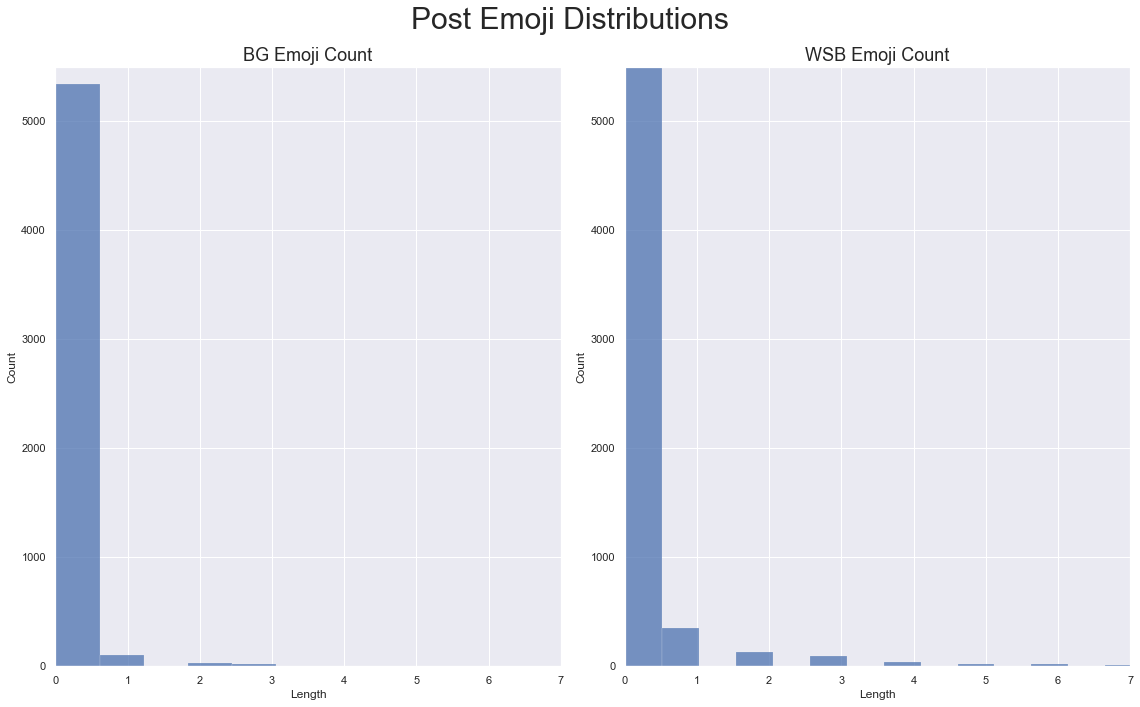

In [71]:
fig, ax = plt.subplots(1, 2, figsize=(16,10))
sns.set(style="darkgrid")
sns.histplot(bg_df['subreddit_text_emoji_count'], ax=ax[0], bins=250)
sns.histplot(wsb_df['subreddit_text_emoji_count'], ax=ax[1], bins=250)

ax[0].set(xlabel='Length', title='BG Emoji Count', xlim=[0, 7], ylim=[0, 5500])
ax[1].set(xlabel='Length', title='WSB Emoji Count', xlim=[0, 7], ylim=[0, 5500])

for ax_it in ax:
    ax_it.title.set_fontsize(18)

fig.set_tight_layout(True)
fig.suptitle('Post Emoji Distributions', fontsize=30);

fig.savefig('../presentation/charts/emoji_dist')

In [72]:
bg_df['subreddit_text_emoji_count'].describe()

count    5523.000000
mean        0.223067
std         4.021519
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       153.000000
Name: subreddit_text_emoji_count, dtype: float64

In [73]:
wsb_df['subreddit_text_emoji_count'].describe()

count    7372.000000
mean        0.205507
std         1.671245
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       128.000000
Name: subreddit_text_emoji_count, dtype: float64

----
Top 20 Words

In [74]:
def custom_preprocessor(text):
    text = text.lower()
    text = re.sub("\\n", "", text)
    text = re.sub('(x200b)|(http)|(https)|(\')|(amp)|(com)|(png)|(www)|\d{4}', '', text)

    text = re.findall("[\w']+", text)
    # Multi space to single space
    return " ".join(text)


analyzer = CountVectorizer(
    stop_words=stopwords.words("english"), preprocessor=custom_preprocessor, ngram_range=(1,1)
).build_analyzer()


def stemmed_words(text):
    p_stemmer = PorterStemmer()
    return (p_stemmer.stem(w) for w in analyzer(text))


def get_count_vec_stem(df, target):
    cv = CountVectorizer(
        analyzer=stemmed_words,
    )
    df_vect = cv.fit_transform(df["subreddit_text"])
    df_vect_df = pd.DataFrame(df_vect.todense(), columns=cv.get_feature_names_out())

    # Take a look at the top 15 words
    return df_vect_df.sum().sort_values(ascending=False)


C:\Users\btoli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['arent', 'couldnt', 'didnt', 'doesnt', 'dont', 'hadnt', 'hasnt', 'havent', 'isnt', 'mightnt', 'mustnt', 'neednt', 'shant', 'shes', 'shouldnt', 'shouldve', 'thatll', 'wasnt', 'werent', 'wont', 'wouldnt', 'youd', 'youll', 'youre', 'youve'] not in stop_words.
  warnings.warn(


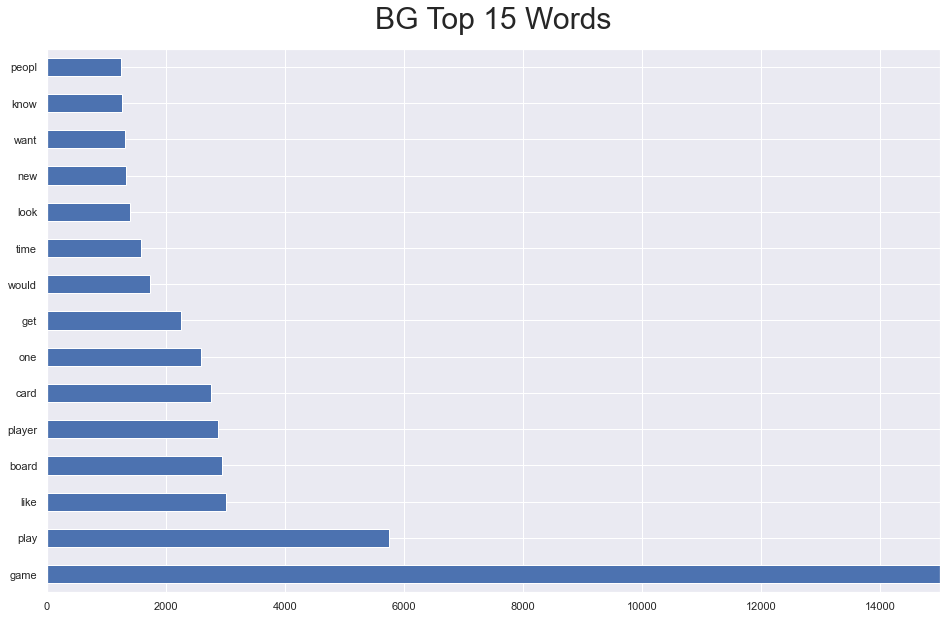

In [75]:
plt.figure(figsize=(16, 10))
plt.title('BG Top 15 Words', fontsize=30, pad=20)
plt.xlim([0, 15_000])
get_count_vec_stem(bg_df, 'subreddit_text').head(15).plot(kind='barh');
plt.savefig('../presentation/charts/bg_top_20_words')

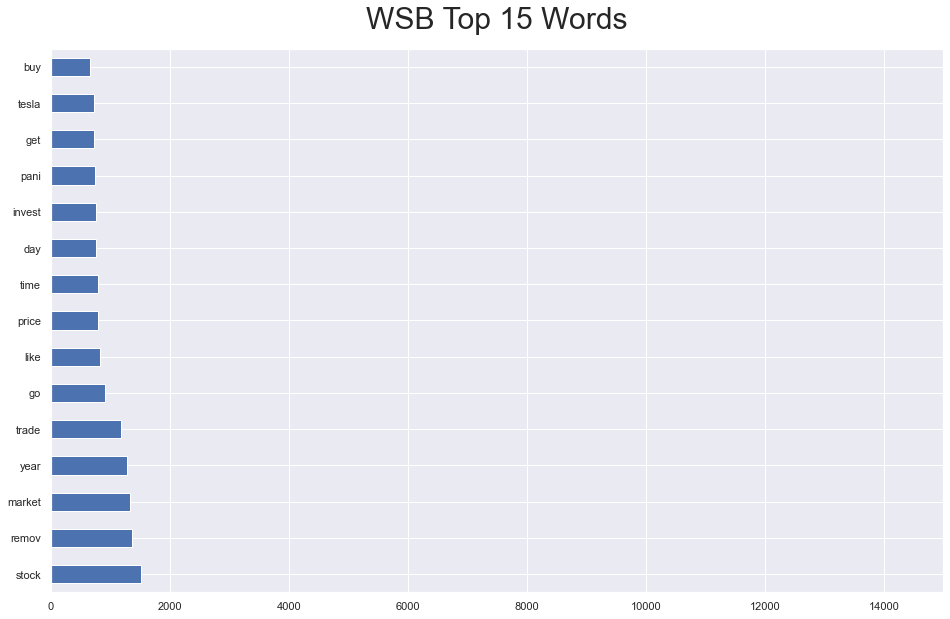

In [76]:
plt.figure(figsize=(16, 10))
plt.title("WSB Top 15 Words", fontsize=30, pad=20)
plt.xlim([0, 15_000])
get_count_vec_stem(wsb_df, "subreddit_text").head(15).plot(kind="barh")
plt.savefig('../presentation/charts/wsb_top_20_words')

In [77]:
top_20_df = pd.concat([
  get_count_vec_stem(wsb_df, "subreddit_text").head(20),
  get_count_vec_stem(bg_df, "subreddit_text").head(20),
],
axis=1).fillna(0)

In [78]:
cross_words = list(top_20_df[(top_20_df[0] > 0) & (top_20_df[1] > 0)].index)

Top Used Words `Relation`

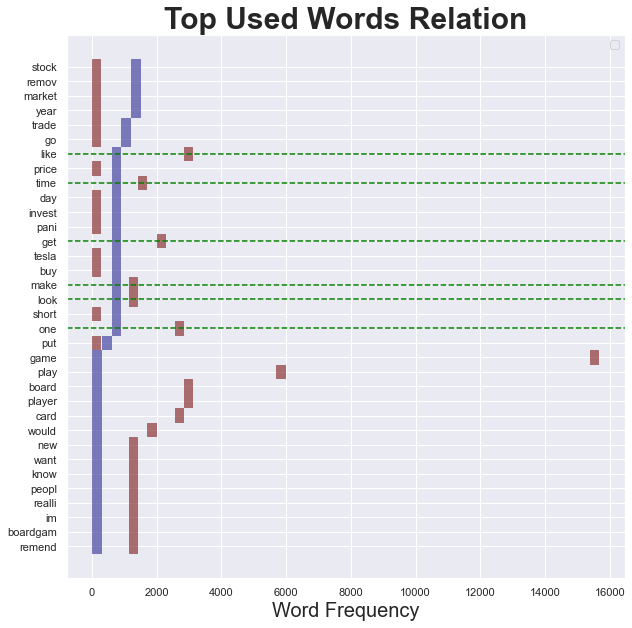

In [79]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.histplot(y=top_20_df.index, x=top_20_df[0], color='blue', alpha=0.7, bins=5)
sns.histplot(y=top_20_df.index, x=top_20_df[1], color='red', alpha=0.7, bins=55)

ax.set_title('Top Used Words Relation', fontsize=30, fontweight='bold')
ax.set_xlabel('Word Frequency', fontsize=20)
ax.legend(['Board Games', 'Wall Street Bets'])

[ax.axhline(y = word, color = 'green', linestyle = '--') for word in cross_words]

plt.savefig('../presentation/charts/top_words_by_subreddit_relation')

----
`Sentiment` Intensity

In [80]:
df.describe()

,score,num_comments,created_utc,subreddit,selftext_length,title_length,title_word_count,selftext_word_count,selftext_emoji_count,title_emoji_count,subreddit_text_length,subreddit_text_word_count,subreddit_text_emoji_count,subreddit_text_sent_neg,subreddit_text_sent_neu,subreddit_text_sent_pos,subreddit_text_sent_compound
count,12895.000000,12895.000000,1.289500e+04,12895.000000,12895.000000,12895.000000,12895.000000,12895.000000,12895.000000,12895.000000,12895.000000,12895.000000,12895.000000,12895.000000,12895.000000,12895.000000,12895.000000
mean,1.014502,0.708414,1.672003e+09,0.571694,341.257697,50.246219,9.055991,57.315859,0.099186,0.113843,392.503916,65.442807,0.213028,0.055433,0.819779,0.121294,0.229204
std,0.717736,0.832843,1.580846e+06,0.494852,1377.531722,35.521335,6.540976,231.190224,2.631675,1.260319,1380.319414,229.312219,2.919394,0.108146,0.181004,0.152114,0.489552
min,0.000000,0.000000,1.667504e+09,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-0.998400
25%,1.000000,0.000000,1.671554e+09,0.000000,0.000000,26.000000,5.000000,1.000000,0.000000,0.000000,39.000000,7.000000,0.000000,0.000000,0.724000,0.000000,0.000000
50%,1.000000,1.000000,1.672531e+09,1.000000,9.000000,41.000000,7.000000,1.000000,0.000000,0.000000,87.000000,15.000000,0.000000,0.000000,0.840000,0.080000,0.000000
75%,1.000000,1.000000,1.673064e+09,1.000000,290.000000,66.000000,12.000000,50.000000,0.000000,0.000000,335.000000,57.000000,0.000000,0.069000,1.000000,0.192000,0.659700
max,61.000000,24.000000,1.673647e+09,1.000000,39223.000000,302.000000,60.000000,7164.000000,153.000000,128.000000,39244.000000,7107.000000,153.000000,1.000000,1.000000,1.000000,1.000000


C:\Users\btoli\AppData\Local\Temp\ipykernel_6076\2329293361.py:3: FutureWarning: ['selftext', 'title', 'domain', 'id', 'author', 'url', 'subreddit_text'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby("subreddit").agg(["mean"])[


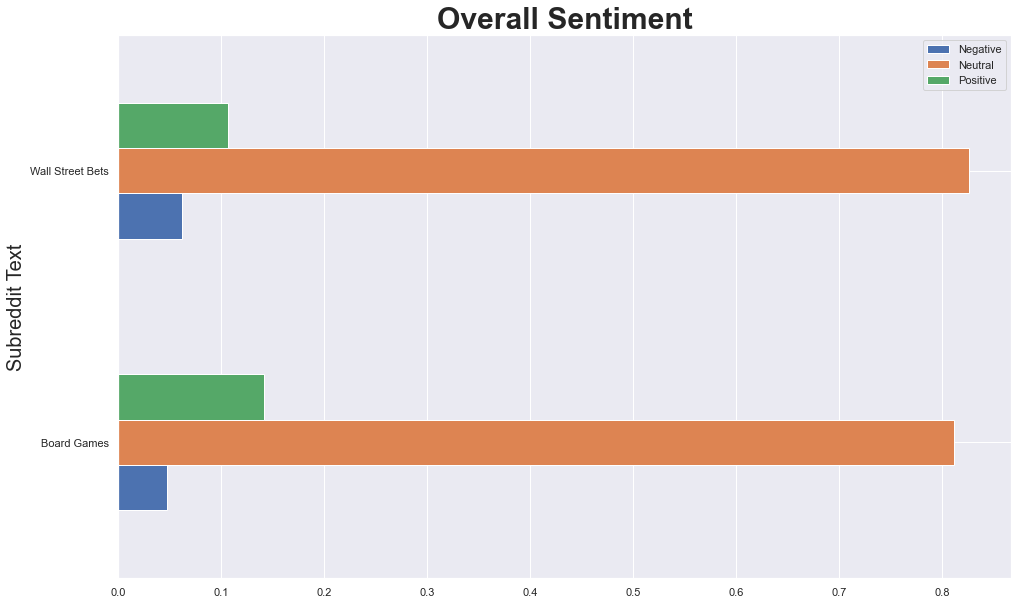

In [81]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10))

df.groupby("subreddit").agg(["mean"])[
    ["subreddit_text_sent_neg", "subreddit_text_sent_neu", "subreddit_text_sent_pos"]
].plot(kind="barh", ax=ax)

ax.set_title('Overall Sentiment', fontsize=30, fontweight='bold')
ax.set_ylabel('Subreddit Text', fontsize=20)
ax.legend(['Negative', 'Neutral', 'Positive'])
ax.set_yticklabels(['Board Games', 'Wall Street Bets'])

plt.savefig('../presentation/charts/subreddit_sentiment')

----
Posts By `Weekday`

In [82]:
def epoch_to_date(ep):
  return datetime.fromtimestamp(ep)

In [83]:
df['post_date'] = df['created_utc'].apply(epoch_to_date)
df.sort_values(by='post_date', inplace=True)
bg_df = df[df['subreddit'] == 0]
wsb_df = df[df['subreddit'] == 1]

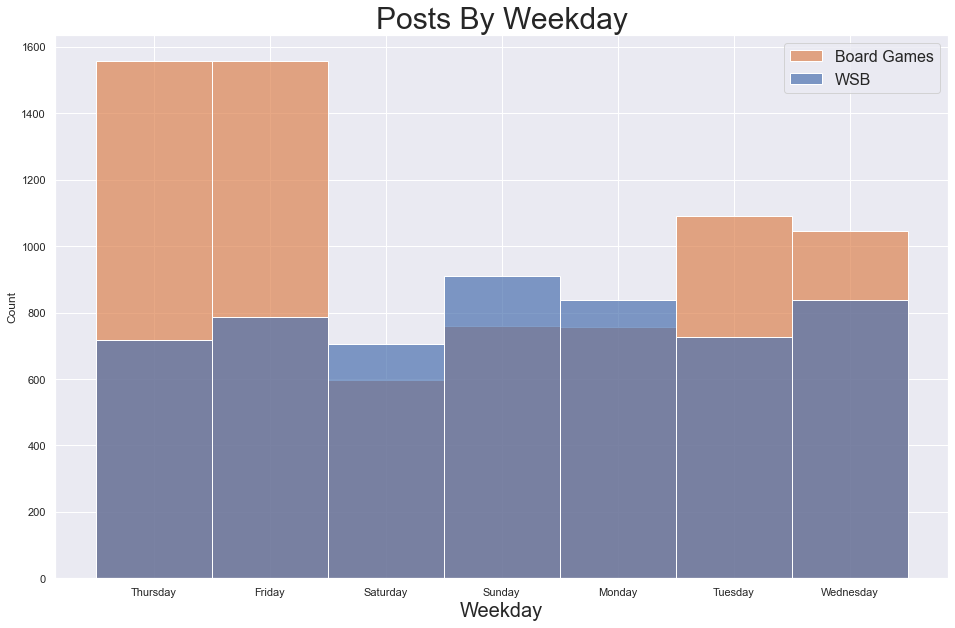

In [84]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10))
sns.histplot(df, x=df['post_date'].dt.day_name(), color='blue', hue='subreddit', alpha=0.7, ax=ax)

ax.set_title('Posts By Weekday', fontsize=30)
ax.legend(['Board Games', 'WSB'], prop={'size': 16})
ax.set_xlabel('Weekday', fontsize=20)

plt.savefig('../presentation/charts/post_by_week')

----
## Popular Posts Analysis


In [85]:
engage_df = df[df['num_comments'] > 2]

bg_df = engage_df[engage_df['subreddit'] == 0]
wsb_df = engage_df[engage_df['subreddit'] == 1]

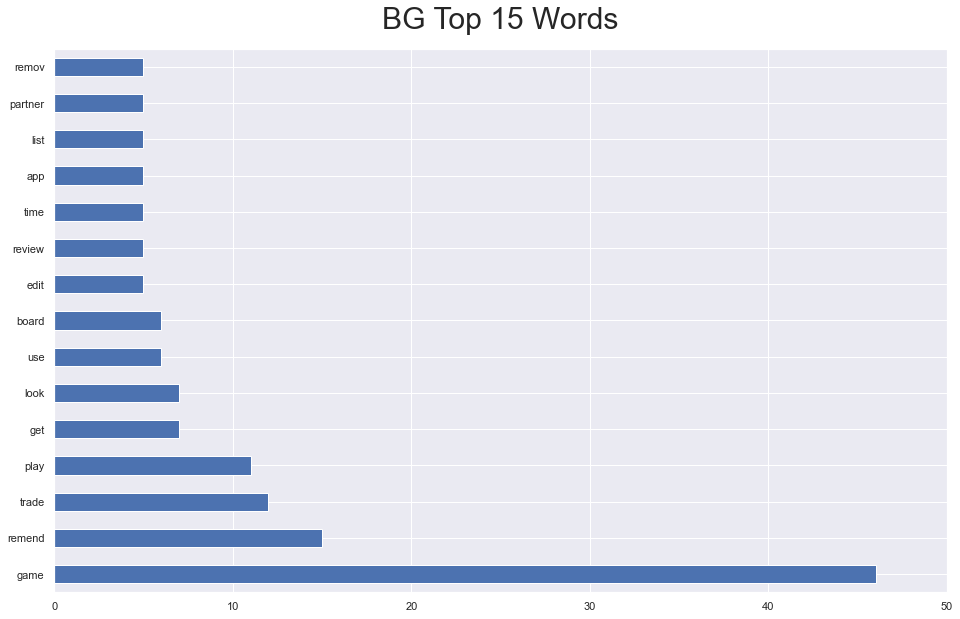

In [86]:
plt.figure(figsize=(16, 10))
plt.title('BG Top 15 Words', fontsize=30, pad=20)
plt.xlim([0, 50])
get_count_vec_stem(bg_df, 'subreddit_text').head(15).plot(kind='barh');
plt.savefig('../presentation/charts/engage_bg_top_20_words')

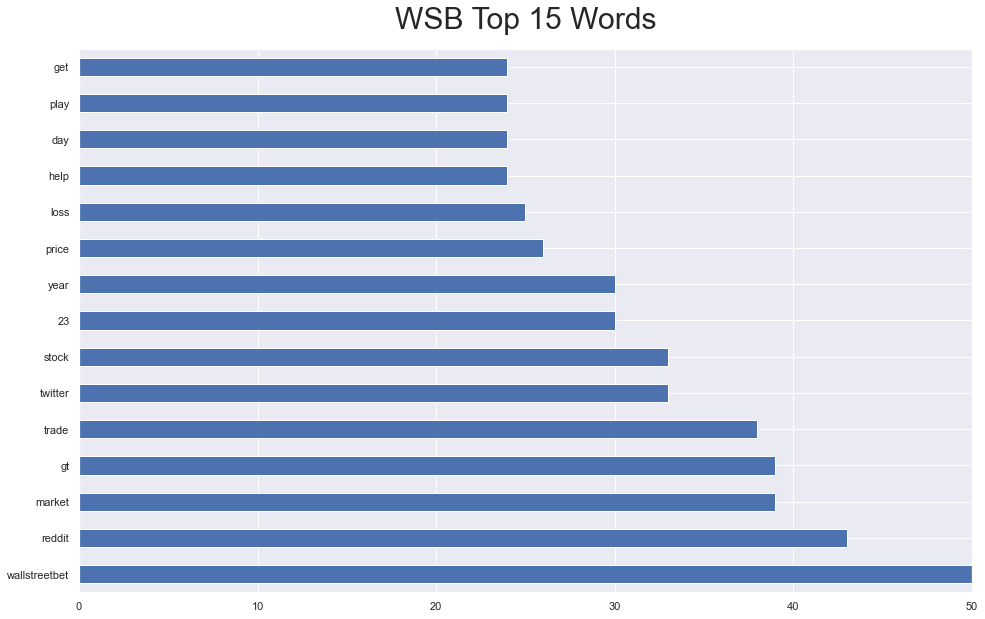

In [87]:
plt.figure(figsize=(16, 10))
plt.title("WSB Top 15 Words", fontsize=30, pad=20)
plt.xlim([0, 50])
get_count_vec_stem(wsb_df, "subreddit_text").head(15).plot(kind="barh")
plt.savefig('../presentation/charts/engage_wsb_top_20_words')

In [88]:
top_20_df = pd.concat([
  get_count_vec_stem(wsb_df, "subreddit_text").head(20),
  get_count_vec_stem(bg_df, "subreddit_text").head(20),
],
axis=1).fillna(0).sort_values([0, 1], ascending = [True, True])

In [89]:
cross_words = list(top_20_df[(top_20_df[0] > 0) & (top_20_df[1] > 0)].index)

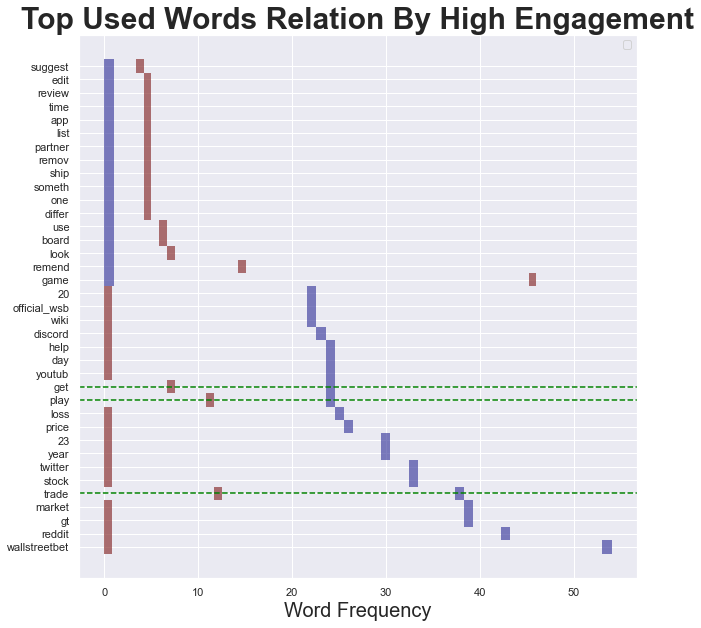

In [90]:
ig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.histplot(y=top_20_df.index, x=top_20_df[0], color='blue', alpha=0.7, bins=55)
sns.histplot(y=top_20_df.index, x=top_20_df[1], color='red', alpha=0.7, bins=55)

ax.set_title('Top Used Words Relation By High Engagement', fontsize=30, fontweight='bold')
ax.set_xlabel('Word Frequency', fontsize=20)
ax.legend(['Board Games', 'Wall Street Bets'])

[ax.axhline(y = word, color = 'green', linestyle = '--') for word in cross_words]

plt.savefig('../presentation/charts/engage_top_words_by_subreddit_relation')

C:\Users\btoli\AppData\Local\Temp\ipykernel_6076\2267897102.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  engage_df.sort_values(by='post_date', inplace=True)


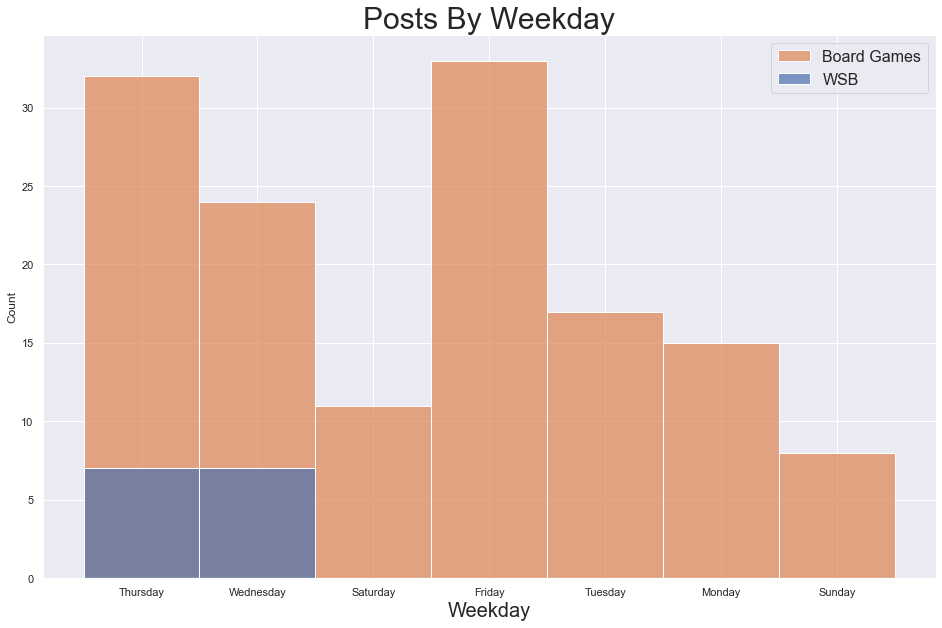

In [91]:
engage_df.sort_values(by='post_date', inplace=True)

fig, ax = plt.subplots(1, 1, figsize=(16, 10))
sns.histplot(df, x=engage_df['post_date'].dt.day_name(), color='blue', hue='subreddit', alpha=0.7, ax=ax)

ax.set_title('Posts By Weekday', fontsize=30)
ax.legend(['Board Games', 'WSB'], prop={'size': 16})
ax.set_xlabel('Weekday', fontsize=20)

plt.savefig('../presentation/charts/engage_post_by_week')

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12895 entries, 4909 to 11898
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   selftext                      6983 non-null   object        
 1   title                         12895 non-null  object        
 2   score                         12895 non-null  int64         
 3   domain                        12895 non-null  object        
 4   id                            12895 non-null  object        
 5   author                        12895 non-null  object        
 6   num_comments                  12895 non-null  int64         
 7   url                           12895 non-null  object        
 8   created_utc                   12895 non-null  int64         
 9   subreddit                     12895 non-null  int64         
 10  selftext_length               12895 non-null  int64         
 11  title_length             

----
## `C`onclusion & `R`ecommendation:

**AdEvil** tasked to create models to classify subreddit post based on the subreddit it belongs. The main goal is to make targeted ads to posts that has highest engagement. Using best practices and state of the art NLP we have reached one of the best models we have seen so far.

- Stage 1:
    - Cleanup & EDA:
      - We have identified from the scrapped dataset during cleanup, many of the posts were missing `body` text. To tackle this issue, we have combined `body` and `title` text to avoid `null` values and called new entry as `subreddit_text`.
      - Stripped and cleaned all non alphanumeric values
      - Calculated `length` and `word-count` for `subreddit_text`
      - Counted number of emojis used in a text 
    - Preprocessing & Modeling:
      - Based on all the modeling that has been conducted `VotingClassifier` performed best by injecting best estimators from individual models:
       - `MultinomialNB`
         - [94/93] 
         - [Confidence Interval: 93.32 ± 0.02] 
       - `LogisticRegression` 
         - [97/94]
         - [Confidence Interval: 93.94 ± 0.01]
       - `RandomForest` 
        - [83/83]
         - [Confidence Interval: 82.93 ± 0.02]


As the initial stage of configuring model, we have decided to create classification model to correctly identify which post belongs to subreddit in simulated unseen data. Model's accuracy 95.2%, Specificity 92% and Sensitivity 97%. Since models performing well, we are ready to move on to Stage 2 of the process. Our recommendation includes:
  - Use following words to create interactive survey to collect behavioral scoring from both subreddit:
    - ['market', 'reddit',  'year', 'stock', 'twitter', 'loss', 'price', 'get', 'help', 'day', 'youtube', 'discord', 'would', 'wiki', 'go', 'play']
  - Post it on `Wednesday` or `Friday` to get possible highest engagement
  - Survey topic ['trade']